## **NYC house prices data**

#### Import the necessary libraries

In [2]:
#%pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the dataset

In [3]:
df = pd.read_csv('nyc_housing_base.csv', sep = ',') 
df.head() 

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
0,1,400,11,280000,10009.0,MN,1900.0,2404.0,6875.0,6875.0,0.0,18.0,18.0,5.0,40.724415,-73.983891,2.0,C6,125.0
1,1,402,36,2000000,10009.0,MN,1900.0,1919.0,7810.0,6810.0,1000.0,8.0,10.0,5.0,40.724975,-73.981535,2.0,C4,125.0
2,1,402,60,3400000,10009.0,MN,1920.0,2150.0,6152.0,5352.0,800.0,8.0,9.0,5.0,40.725346,-73.983112,4.0,C7,105.0
3,1,404,42,4000000,10009.0,MN,1855.0,2369.0,6990.0,6990.0,0.0,10.0,10.0,5.0,40.727398,-73.980600,2.0,C4,170.0
4,1,372,55,655000,10009.0,MN,1920.0,5298.0,17990.0,17990.0,0.0,20.0,20.0,5.0,40.720621,-73.979534,2.0,C6,105.0


### **Dataset Exploration - Raw Data**

#### Understanding the dataset

In [4]:
# dataset size
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

# data types
print("Dataset types:\n", df.dtypes)

Number of rows: 34439
Number of columns: 19
Dataset types:
 borough_x         int64
block             int64
lot               int64
sale_price        int64
zip_code        float64
borough_y        object
yearbuilt       float64
lotarea         float64
bldgarea        float64
resarea         float64
comarea         float64
unitsres        float64
unitstotal      float64
numfloors       float64
latitude        float64
longitude       float64
landuse         float64
bldgclass        object
building_age    float64
dtype: object


In [5]:
# summary statistics
df.describe()

,borough_x,block,lot,sale_price,zip_code,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,building_age
count,34439.000000,34439.000000,34439.000000,3.443900e+04,34423.000000,34439.000000,3.443900e+04,3.443900e+04,3.425100e+04,3.425100e+04,34439.000000,34439.000000,34396.000000,34433.000000,34433.000000,34436.000000,34439.000000
mean,3.073608,4562.694532,60.057174,1.171832e+06,10866.464370,1941.007579,5.244022e+04,6.271570e+04,5.593040e+04,6.846554e+03,51.716775,52.309765,4.227674,40.707342,-73.919829,1.943112,83.992421
std,1.287072,3611.017542,136.516558,1.241375e+06,557.770632,28.985203,5.032042e+05,2.712663e+05,2.116029e+05,6.971171e+04,173.385339,174.964326,5.230538,0.082194,0.108336,1.345451,28.985203
min,1.000000,1.000000,1.000000,1.186300e+04,10001.000000,1800.000000,1.610000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,40.500291,-74.253599,1.000000,0.000000
25%,2.000000,1432.000000,14.000000,5.125000e+05,10308.000000,1920.000000,2.090000e+03,1.614500e+03,1.356000e+03,0.000000e+00,1.000000,1.000000,2.000000,40.640011,-73.978330,1.000000,65.000000
50%,3.000000,3854.000000,33.000000,8.250000e+05,11210.000000,1935.000000,3.090000e+03,2.494000e+03,2.120000e+03,0.000000e+00,2.000000,2.000000,2.000000,40.705836,-73.915430,1.000000,90.000000
75%,4.000000,6678.000000,59.000000,1.300000e+06,11364.000000,1960.000000,7.502000e+03,1.450000e+04,9.816000e+03,0.000000e+00,13.000000,15.000000,4.000000,40.759718,-73.846150,3.000000,105.000000
max,5.000000,16350.000000,3635.000000,9.995000e+06,11697.000000,2025.000000,2.225160e+07,3.750565e+06,2.690565e+06,1.100000e+06,1887.000000,1906.000000,54.000000,40.912745,-73.700488,11.000000,225.000000


              Column  Missing_Count  Missing_Percentage
resarea      resarea            188                0.55
comarea      comarea            188                0.55
numfloors  numfloors             43                0.12
zip_code    zip_code             16                0.05
latitude    latitude              6                0.02
longitude  longitude              6                0.02
landuse      landuse              3                0.01


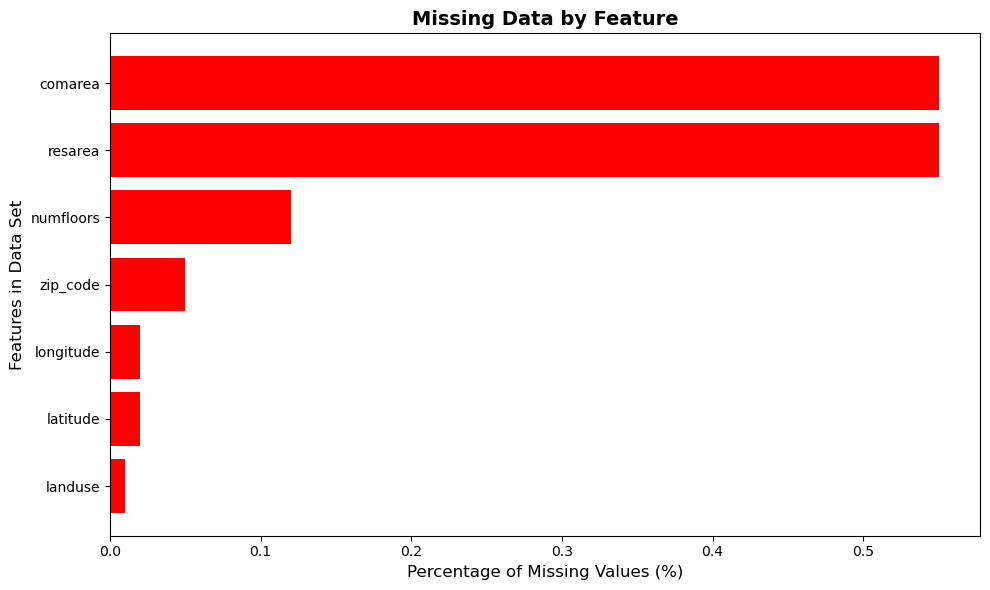

In [6]:
# missing values analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

# filter and sort missing data, only show columns with missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data)

# visualize the missing data in a bar plot
plt.figure(figsize=(10, 6))
missing_data_sorted = missing_data.sort_values('Missing_Percentage', ascending=True)
plt.barh(missing_data_sorted['Column'], missing_data_sorted['Missing_Percentage'], color='red')
plt.xlabel('Percentage of Missing Values (%)', fontsize=12)
plt.ylabel('Features in Data Set', fontsize=12)
plt.title('Missing Data by Feature', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### Target Variable Analysis
This is done by examining the distribution and characteristics of the target variable: `sale_price`.

Sale price summary statistics:
count    3.443900e+04
mean     1.171832e+06
std      1.241375e+06
min      1.186300e+04
25%      5.125000e+05
50%      8.250000e+05
75%      1.300000e+06
max      9.995000e+06
Name: sale_price, dtype: float64


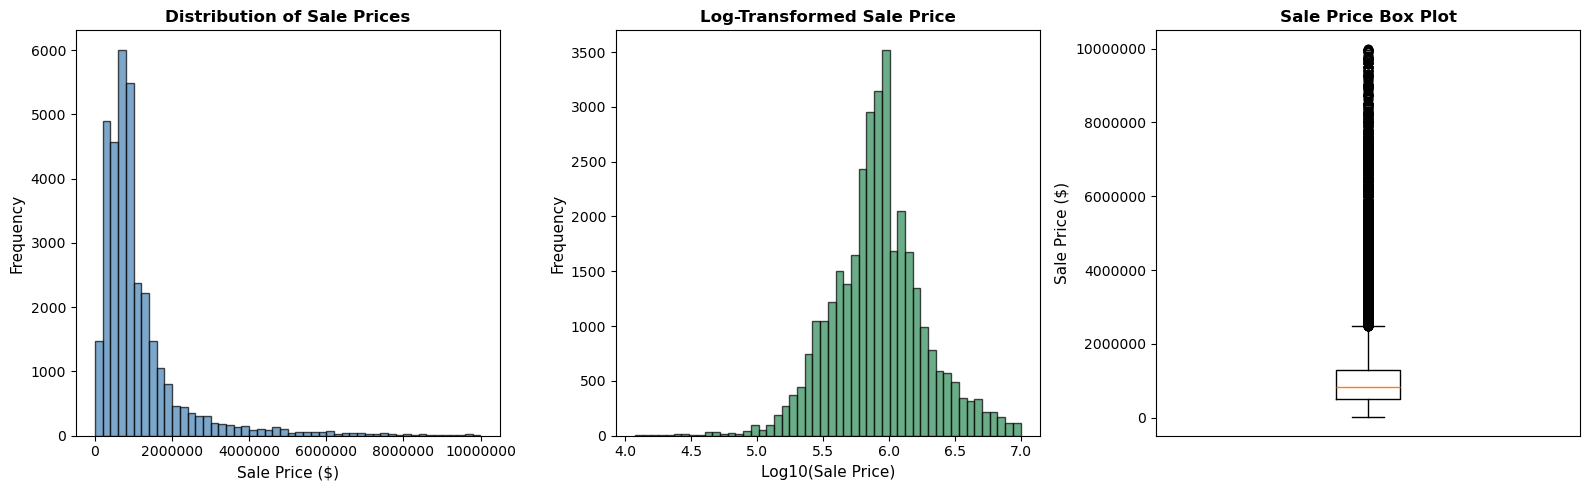

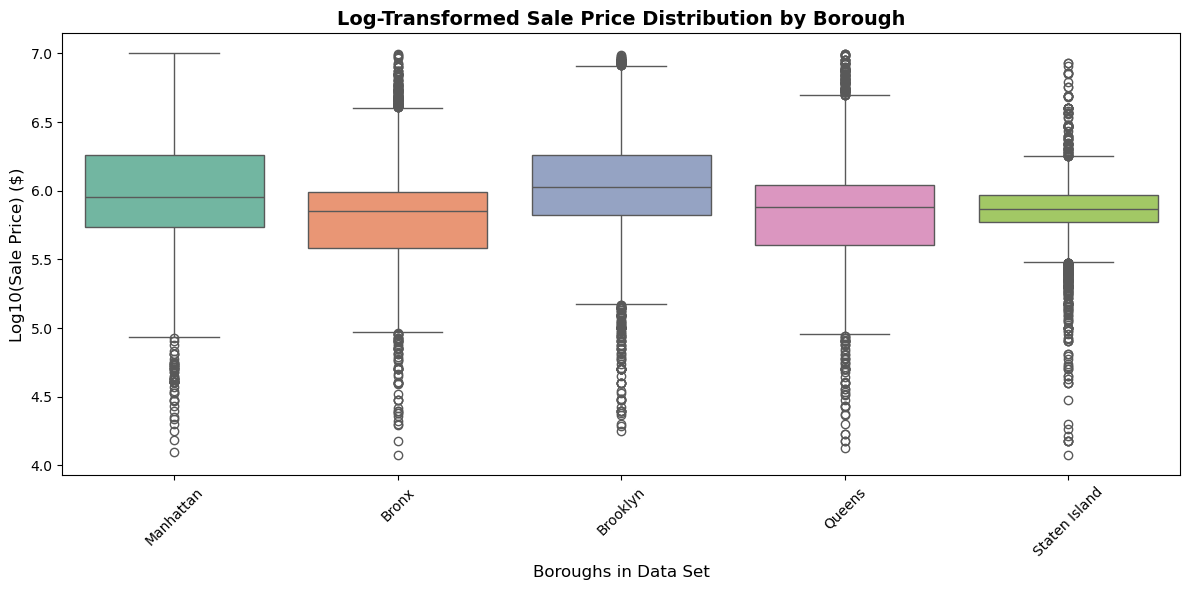


Sale price by borough:
               count          mean     median           std
borough_name                                               
Bronx           3389  9.560876e+05   710000.0  1.125213e+06
Brooklyn        8761  1.491933e+06  1065000.0  1.350283e+06
Manhattan       6721  1.565882e+06   895000.0  1.746846e+06
Queens         11770  8.851987e+05   760000.0  8.052374e+05
Staten Island   3798  8.169079e+05   735500.0  5.446832e+05


In [7]:
# Sale Price Analysis - the target variable 'sale_price'
print("Sale price summary statistics:")
# basic statistics of sale price
print(df['sale_price'].describe()) 

# setting up the matplotlib figure and axes for the plots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))     # create 1 row, 3 columns of subplots

# PLOTS
# 1 - histogram of sale price distribution
axes[0].hist(df['sale_price'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)    # create histogram
axes[0].set_xlabel('Sale Price ($)', fontsize=11)   # x-axis label
axes[0].set_ylabel('Frequency', fontsize=11)        # y-axis label
axes[0].set_title('Distribution of Sale Prices', fontsize=12, fontweight='bold')    # title
axes[0].ticklabel_format(style='plain', axis='x')   # prevent scientific notation on x-axis

# 2 - log-transformed histogram of sale price distribution
axes[1].hist(np.log10(df['sale_price']), bins=50, color='seagreen', edgecolor='black', alpha=0.7)  # create histogram
axes[1].set_xlabel('Log10(Sale Price)', fontsize=11)    # x-axis label
axes[1].set_ylabel('Frequency', fontsize=11)    # y-axis label
axes[1].set_title('Log-Transformed Sale Price', fontsize=12, fontweight='bold')  # title

# 3 - box plot of sale price
axes[2].boxplot(df['sale_price'], vert=True)        # create box plot
axes[2].set_ylabel('Sale Price ($)', fontsize=11)   # y-axis label
axes[2].set_xticks([])                            # remove x-axis ticks
axes[2].set_xlabel('')                            # remove x-axis label
axes[2].set_title('Sale Price Box Plot', fontsize=12, fontweight='bold')  # title
axes[2].ticklabel_format(style='plain', axis='y')   # prevent scientific notation on y-axis

# adjust layout and show plots
plt.tight_layout()
plt.show()

# 4 - box plot of sale price by borough
borough_names = {1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'} # mapping borough codes to names
df['borough_name'] = df['borough_x'].map(borough_names) # create new column with borough names instead of codes

# created box plot 
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='borough_name',
    y=np.log10(df['sale_price']),
    hue='borough_name',
    palette='Set2',
    legend=False
)
# customizing the plots
plt.xlabel('Boroughs in Data Set', fontsize=12) # x-axis label
plt.ylabel('Log10(Sale Price) ($)', fontsize=12) # y-axis label
plt.title('Log-Transformed Sale Price Distribution by Borough', fontsize=14, fontweight='bold') # title
plt.xticks(rotation=45) # rotate x-axis labels for better readability
plt.ticklabel_format(style='plain', axis='y') # prevent scientific notation on y-axis
plt.tight_layout() # adjust layout
plt.show() # show plots

# summary by borough of sale price
print("\nSale price by borough:")
print(df.groupby('borough_name')['sale_price'].agg(['count', 'mean', 'median', 'std']))

#### Feature Distributions

Done by examining the distributions of key numerical features, to better understand their ranges and variability.


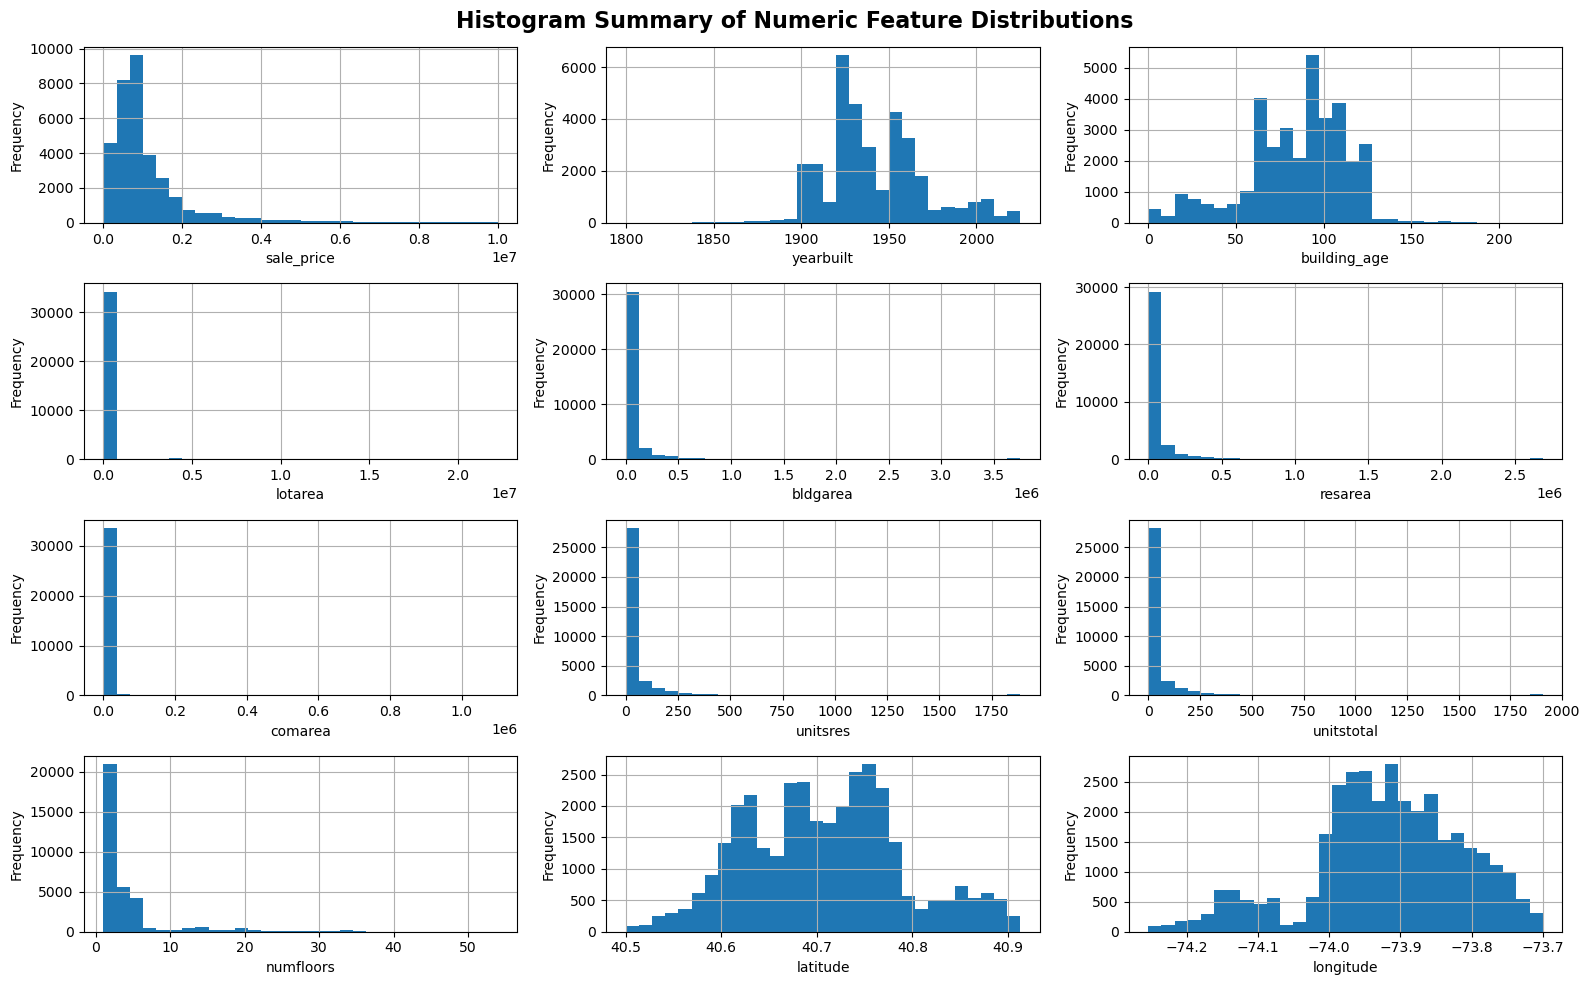

In [8]:
# correlation analysis of numeric features
# define numeric columns for correlation analysis - these are the relevant numeric features in the dataset
numeric_cols = [
    'sale_price',
    'yearbuilt',
    'building_age',
    'lotarea',
    'bldgarea',
    'resarea',
    'comarea',
    'unitsres',
    'unitstotal',
    'numfloors',
    'latitude',
    'longitude'
]

# display summary statistics of numeric columns
df[numeric_cols].describe()

# histograms of numeric columns for distribution analysis
axes = df[numeric_cols].hist(bins=30, figsize=(16, 10))

for ax in axes.flatten():
    ax.set_xlabel(ax.get_title(), fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title('')

plt.suptitle(
    'Histogram Summary of Numeric Feature Distributions',
    fontsize=16,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


#### Relationship with Target Variable
Analyze the correlations between the numerical features and the target variable.

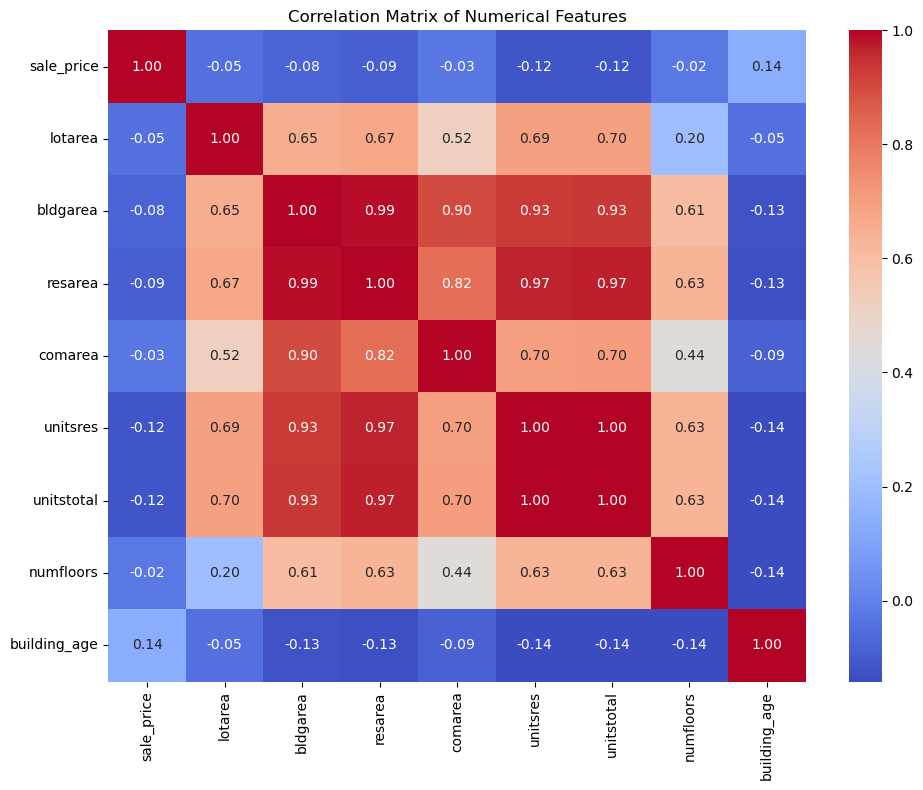

In [9]:
# correlation matrix heatmap
# define columns to include in the correlation matrix
corr_cols = [
    'sale_price',
    'lotarea',
    'bldgarea',
    'resarea',
    'comarea',
    'unitsres',
    'unitstotal',
    'numfloors',
    'building_age'
]

# plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[corr_cols].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
# customizing the plot
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


### **Data Transformation**

#### Clean missing values

##### zipcode column

In [10]:
# fill missing zip_code values with the most common (mode) zip_code in the same borough
print("Missing values in zip_code: ", df[df['zip_code'].isna()].shape[0])
df['zip_code'] = df.groupby('borough_x')['zip_code']\
                    .transform(lambda x: x.fillna(x.mode()[0]))

# check if there are still missing values
print("After imputation, missing values in zip_code: ", df["zip_code"].isna().sum())

Missing values in zip_code:  16
After imputation, missing values in zip_code:  0


##### resarea & comarea columns

In [11]:
# impute missing values for resarea and comarea with 0
# assuming that missing values indicate no residential or commercial area
print("Missing values in resarea: ", df[df['resarea'].isna()].shape[0])
print("Missing values in comarea: ", df[df['comarea'].isna()].shape[0])
df['resarea'] = df['resarea'].fillna(0)
df['comarea'] = df['comarea'].fillna(0)

# check if there are still missing values
print("After imputation, missing values in resarea and comarea:")
df[['resarea', 'comarea']].isna().sum()


Missing values in resarea:  188
Missing values in comarea:  188
After imputation, missing values in resarea and comarea:


resarea    0
comarea    0
dtype: int64

##### numfloors column

In [12]:
# impute missing values for numfloors with the median number of floors within the same building class
# if building class is also missing -> use overall median

# check how many missing values there are in numfloors
print("Missing values in numfloors: ", df[df['numfloors'].isna()].shape[0])

# compute group medians (NaN [no data] for all-NaN groups), then fill
group_medians = df.groupby('bldgclass')['numfloors'].transform('median')

# fill missing numfloors: first by building class median, then overall median
df['numfloors'] = df['numfloors'].fillna(group_medians)
df['numfloors'] = df['numfloors'].fillna(df['numfloors'].median())

# check if there are still missing values
print("After imputation, missing values in numfloors: ", df['numfloors'].isna().sum())


Missing values in numfloors:  43
After imputation, missing values in numfloors:  0


##### longitude & latitude columns

In [13]:
# impute missing values for longitude with the median longitude within the same borough
# if borough is also missing -> use overall median
print("Missing values in longitude: ", df[df["longitude"].isna()].shape[0])
df['longitude'] = df.groupby('borough_x')['longitude']\
                    .transform(lambda x: x.fillna(x.median()))

# impute missing values for latitude with the median latitude within the same borough
# if borough is also missing -> use overall median
print("Missing values in latitude: ", df[df["latitude"].isna()].shape[0])
df["latitude"] = df.groupby("borough_x")["latitude"]\
                   .transform(lambda x: x.fillna(x.median()))

# check if there are still missing values
print("\nAfter imputation, missing values in longitude and latitude:")
df[['longitude', 'latitude']].isna().sum()

Missing values in longitude:  6
Missing values in latitude:  6

After imputation, missing values in longitude and latitude:


longitude    0
latitude     0
dtype: int64

##### landuse column

In [14]:
# impute missing landuse values - based on resarea and comarea columns
print("Missing values in landuse: ", df[df["landuse"].isna()].shape[0])

# when resare > 0 and comarea = 0 -> impute as 'Residential'
df['landuse'] = np.where(
    df['landuse'].isna() & (df['resarea'] > 0) & (df['comarea'] == 0),
    'Residential',
    df['landuse']
)

# when resarea = 0 and comarea > 0 -> impute as 'Commercial'
df['landuse'] = np.where(
    df['landuse'].isna() & (df['resarea'] == 0) & (df['comarea'] > 0),
    'Commercial',
    df['landuse']
)

# when resarea > 0 and comarea > 0 -> impute as 'Mixed Use'
df['landuse'] = np.where(
    df['landuse'].isna() & (df['resarea'] > 0) & (df['comarea'] > 0),
    'Mixed Use',
    df['landuse']
)

# check remaining missing landuse values
print("After imputation, missing values in landuse: ", df["landuse"].isna().sum())


Missing values in landuse:  3
After imputation, missing values in landuse:  0


#### check missing values again

In [15]:
# check missing values
print(df.isnull().sum())

borough_x       0
block           0
lot             0
sale_price      0
zip_code        0
borough_y       0
yearbuilt       0
lotarea         0
bldgarea        0
resarea         0
comarea         0
unitsres        0
unitstotal      0
numfloors       0
latitude        0
longitude       0
landuse         0
bldgclass       0
building_age    0
borough_name    0
dtype: int64


#### Data duplication
The data in the set appeared to have 1003 duplicate rows, which after some careful analyzing was deduced that it needed to be removed from the dataset before the set can be used (to prevent overfitting).

In [16]:
#checking for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

print("Displaying the first 5 duplicate rows (including all occurrences):")
# display duplicate rows
print(df[df.duplicated(keep=False)].head())

# analyze duplicate rows, by grouping on key columns
# grouping duplicates by ['borough_x', 'block', 'lot', 'sale_price'] and counting occurrences in each group
# -> shows which combinations appear most frequently as duplicates
duplicate_groups = df[df.duplicated(keep=False)] \
  .groupby(['borough_x', 'block', 'lot', 'sale_price']) \
  .size() \
  .sort_values(ascending=False) \
  .head()
print(duplicate_groups)

# remove duplicates
df = df.drop_duplicates()

# verifying if all duplicates have been removed or not
print("Verifying that all duplicates have been removed")
remaining_duplicates = df.duplicated().sum()
print("Number of remaining duplicate rows:", remaining_duplicates)

# final dataset size
print("Number of rows after removing duplicates:", df.shape[0])

Number of duplicate rows: 1003
Displaying the first 5 duplicate rows (including all occurrences):
     borough_x  block  lot  sale_price  zip_code borough_y  yearbuilt  \
89           1    720   74     1135000   10011.0        MN     1857.0   
90           1    720   74     1135000   10011.0        MN     1857.0   
128          1    765   59      791134   10011.0        MN     1901.0   
129          1    765   59      791134   10011.0        MN     1901.0   
130          1    765   59      791134   10011.0        MN     1901.0   

     lotarea  bldgarea  resarea  comarea  unitsres  unitstotal  numfloors  \
89    2172.0    6349.0   6349.0      0.0      10.0        10.0        5.0   
90    2172.0    6349.0   6349.0      0.0      10.0        10.0        5.0   
128   2581.0    9985.0   9985.0      0.0      17.0        17.0        5.0   
129   2581.0    9985.0   9985.0      0.0      17.0        17.0        5.0   
130   2581.0    9985.0   9985.0      0.0      17.0        17.0        5.0   



#### Variable Transformations

##### Target Variable Transformation 
Apply a logarithmic transformation (base-10) to the `sale_price` column to reduce right skewness and stabilize variance.

In [17]:
# ensure sale_price is positive before log transform
df = df.loc[df['sale_price'] > 0].copy()

# log-transform target variable
df['log_sale_price'] = np.log10(df['sale_price'])

# drop original sale_price to avoid confusion 
df.drop('sale_price', axis=1, inplace=True)

# summary statistics
df['log_sale_price'].describe()

count    33436.000000
mean         5.917390
std          0.353203
min          4.074195
25%          5.718882
50%          5.916454
75%          6.110590
max          6.999783
Name: log_sale_price, dtype: float64

##### Borough Naming 
check whether borough_y and borough_x match, if not then remove borough_y as it is not as relevant as borough_x.

In [18]:
# mapping dictionary
# to map numeric borough codes to names
borough_names = {
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
}

# mapping dictionary 
# to map PLUTO borough [borough_y] as abbreviations to numeric codes
borough_abbrev_to_code = {
    'MN': 1,
    'BX': 2,
    'BK': 3,
    'QN': 4,
    'SI': 5
}

# convert borough_y abbreviations into numeric codes
df['borough_y_code'] = df['borough_y'].map(borough_abbrev_to_code)

# compare borough codes from sales data (borough_x) and borough_y_code
borough_match_counts = (df['borough_x'] == df['borough_y_code']).value_counts(dropna=False)
# print results
print("Borough consistency check (borough_x 'sales' vs borough_y 'PLUTO'):")
print(borough_match_counts)

# create more readable borough name using borough_x and mapping dictionary
df['borough_name'] = df['borough_x'].map(borough_names)

# as borough_y is now redundant, drop to avoid confusion and multicollinearity
df = df.drop(columns=['borough_y', 'borough_y_code'])

# final sanity check of borough related columns
print("\nRemaining borough-related columns:")
print([col for col in df.columns if 'borough' in col])


Borough consistency check (borough_x 'sales' vs borough_y 'PLUTO'):
True     24655
False     8781
Name: count, dtype: int64

Remaining borough-related columns:
['borough_x', 'borough_name']


### **Modeling**

#### Selecting Features

In [19]:
# Selected features for modeling, based on correlation analysis and domain knowledge 
# (excluding 'sale_price' which is the target variable)
features = [
    'borough_x',
    'zip_code',
    'lotarea',
    'bldgarea',
    'resarea',
    'comarea',
    'unitsres',
    'unitstotal',
    'numfloors',
    'building_age',
    'latitude',
    'longitude'
]

# define feature matrix X
X = df[features]
# define target variable y
y = df['log_sale_price']


#### Train-Test Data Split

In [20]:
# import train_test_split for splitting the dataset
from sklearn.model_selection import train_test_split

# split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### Baseline Linear Regression Model

In [21]:
# import LinearRegression and mean_squared_error for modeling and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train linear regression model
lin_reg = LinearRegression()
# fit the model to the training data
lin_reg.fit(X_train, y_train)

# make predictions on the test set
y_pred_lr = lin_reg.predict(X_test)

# evaluate the model performance using RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("RMSE for Linear Regression: ", rmse_lr)


RMSE for Linear Regression:  0.3250996158369109


#### Ridge Regression (Regularization) Model

In [22]:
# import Ridge regression for regularization
from sklearn.linear_model import Ridge

# train Ridge regression model
ridge = Ridge(alpha=1.0)
# fit the model to the training data
ridge.fit(X_train, y_train)

# make predictions on the test set
y_pred_ridge = ridge.predict(X_test)
# evaluate the model performance using RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("RMSE for Ridge Regression: ", rmse_ridge)


RMSE for Ridge Regression:  0.3251000154233748


#### Lasso Regression (Feature Selection) Model

In [23]:
# import Lasso regression for regularization
from sklearn.pipeline import Pipeline # for creating a modeling pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# create a pipeline with standard scaling and Lasso regression, then fit and evaluate
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()), # feature scaling
    ('lasso', Lasso(alpha=0.001, max_iter=10000)) # Lasso regression, increased max_iter for convergence
])

# fit the model to the training data
lasso_pipeline.fit(X_train, y_train)

# make predictions on the test set
y_pred_lasso = lasso_pipeline.predict(X_test)
# evaluate the model performance using RMSE 
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("RMSE for Lasso Regression: ", rmse_lasso)


RMSE for Lasso Regression:  0.3277884458247483


#### Random Forest Regression Model

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf
print("RMSE for Random Forest Regression: ", rmse_rf)

RMSE for Random Forest Regression:  0.25442239378517484


#### Model Comparison Table

In [25]:
# summarize model results in a dataframe
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'RandomForestRegressor'],
    'RMSE (log scale)': [rmse_lr, rmse_ridge, rmse_lasso, rmse_rf]
})

# display the model results
model_results


,Model,RMSE (log scale)
0,Linear Regression,0.325100
1,Ridge Regression,0.325100
2,Lasso Regression,0.327788
3,RandomForestRegressor,0.254422


#### Extract Feature Importance 
From the Random Forest Model, extract which features have the most influence.

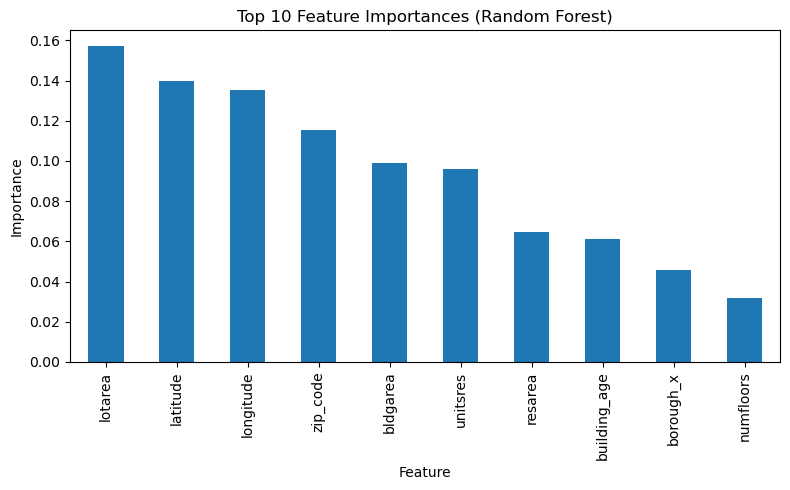

In [26]:
# Extract feature importances from the Random Forest model based on the feature matrix X
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# plot the top 10 feature importances in a bar chart
plt.figure(figsize=(8, 5))
feature_importance.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

### **One-way ANOVA - Hypothesis Testing** 
#### Do sale prices differ significantly across borough? 
Test if the mean log sale price differs across the five NYC boroughs. Null hypothesis 𝐻0: All boroughs have the same mean log sale price. Alternative hypothesis 𝐻1: At least one borough has a different mean log sale price.

                      sum_sq       df           F  PR(>F)
C(borough_name)   268.960996      4.0  576.070348     0.0
Residual         3902.142809  33431.0         NaN     NaN

ANOVA test p-value for borough effect: 0.0

Conclusion:
Can reject the null hypothesis.
There is strong evidence that the mean log sale price differs between boroughs.


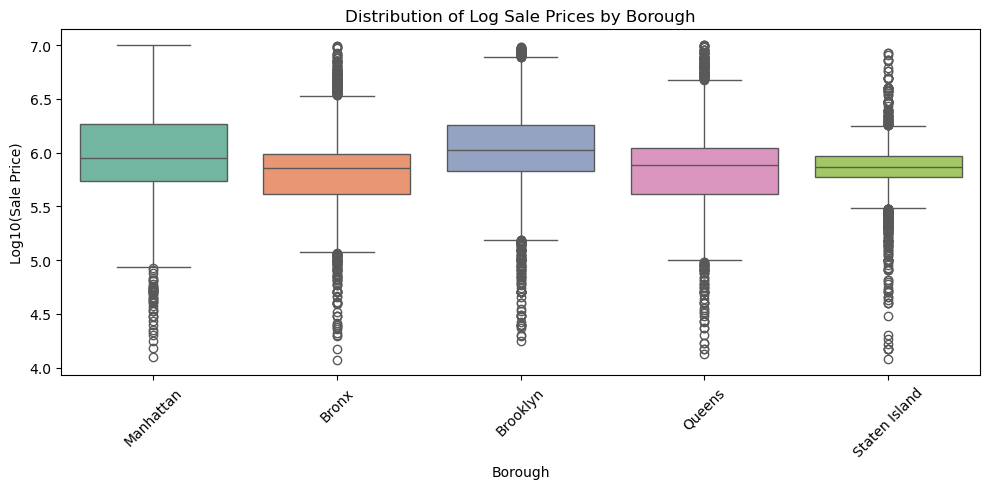

In [27]:
# ANOVA test to see if mean log_sale_price differs by borough
import statsmodels.api as sm
import statsmodels.formula.api as smf

# drop missing values just for the test, store in new variable
anova_df = df[['log_sale_price', 'borough_name']].dropna()

# fit ANOVA model (borough as categorical)
anova_model = smf.ols(
    'log_sale_price ~ C(borough_name)',
    data=anova_df
).fit()

# compute ANOVA table
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# display ANOVA table
print(anova_table)

# extract p-value for borough effect
p_value = anova_table.loc['C(borough_name)', 'PR(>F)']
print("\nANOVA test p-value for borough effect:", p_value)

# conclusion
print("\nConclusion:")
if p_value < 0.05:  # significance level
    print("Can reject the null hypothesis.")
    print("There is strong evidence that the mean log sale price differs between boroughs.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant evidence that the mean log sale price differs between boroughs.")

# visualize log_sale_price distribution by borough using box plots
plt.figure(figsize=(10, 5))
sns.boxplot(
    x='borough_name',   # x-axis title
    y='log_sale_price', # y-axis title
    hue='borough_name', # hue for colour coding
    data=anova_df,      # data source
    palette='Set2',     # colour palette
    legend=False        # hide legend
)

# customizing the plots
plt.title('Distribution of Log Sale Prices by Borough')
plt.xlabel('Borough')
plt.ylabel('Log10(Sale Price)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Extra data: historical and socio-economic features**

To gain a deeper insight and a better understanding of which factors influence these prices, we have enriched our core dataset with historical and socio-economic layers. Firstly we incorporate historical data from the Home Owners' Loan Corporation (HOLC). This dataset provides a window into the 1930s 'redlining' practices, where neighborhoods were graded from 'A' (best) to 'D' (Hazardous) which was often rooted in racial discrimination.  

The original data is geographic, as each area is represented as a polyglon with an associated HOLC grade. To analyze this data alongside the housing prices we have converted it into a tabular format, where each row corresponds to a census tract and contains the key properties:
- `GEOID` = the unique identifier for the tract
- `grade` = the HOLC grade assigned to that area
- `pct_tract` = the percentage of the tract covered by this HOLC area
- `city and state` = the location

To ensure each tract has a single HOLC grade, we use the majority grad, which is the grade covering the largest portion of the tract. This tabular format allows us to easily merge the historical redlining data with the current housing data and perform an analysis. 

Importing the necessary libraries

In [28]:
import geopandas as gpd 
import matplotlib.pyplot as plt

Loading in the GeoJSON file

In [29]:
HOLC_data = gpd.read_file('data/HOLC_areas_crosswalked.geojson')
HOLC_data.head()

,area_id,city,state,city_survey,cat,grade,label,res,com,ind,fill,GISJOIN,GEOID,calc_area,pct_tract,geometry
0,244,Birmingham,AL,True,Best,A,A1,True,False,False,#76a865,G0100730010801,01073010801,3.459131e+05,0.06848,"MULTIPOLYGON (((-86.7722 33.48494, -86.77206 3..."
1,244,Birmingham,AL,True,Best,A,A1,True,False,False,#76a865,G0100730010802,01073010802,2.155205e+06,0.38611,"MULTIPOLYGON (((-86.77244 33.48455, -86.77239 ..."
2,244,Birmingham,AL,True,Best,A,A1,True,False,False,#76a865,G0100730010803,01073010803,2.322751e+04,0.00273,"MULTIPOLYGON (((-86.73481 33.49402, -86.73086 ..."
3,244,Birmingham,AL,True,Best,A,A1,True,False,False,#76a865,G0100730010804,01073010804,1.392696e+06,0.19737,"MULTIPOLYGON (((-86.7462 33.4849, -86.74725 33..."
4,244,Birmingham,AL,True,Best,A,A1,True,False,False,#76a865,G0100730010806,01073010806,8.334346e+05,0.06635,"MULTIPOLYGON (((-86.74596 33.48514, -86.74606 ..."


Understanding the set

In [ ]:
# size
rows, columns = HOLC_data.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

# types
print("Dataset types:\n", HOLC_data.dtypes)

Number of rows: 53483
Number of columns: 16
Dataset types:
 area_id           int32
city             object
state            object
city_survey        bool
cat              object
grade            object
label            object
res                bool
com                bool
ind                bool
fill             object
GISJOIN          object
GEOID            object
calc_area       float64
pct_tract       float64
geometry       geometry
dtype: object


In [ ]:
# summary
HOLC_data.describe()

,area_id,calc_area,pct_tract
count,53483.000000,5.348300e+04,53062.000000
mean,6117.778771,2.982326e+05,0.236196
std,3527.182250,5.097953e+05,0.294156
min,1.000000,0.000000e+00,0.000000
25%,2767.000000,1.462062e+04,0.010240
50%,6123.000000,1.232293e+05,0.100550
75%,9114.000000,3.855282e+05,0.365443
max,11617.000000,1.581475e+07,1.000000


Filtering and selecting rows

In [33]:
cols = ["GEOID", "grade", "pct_tract", "city", "state"] # rows we want to keep
df_holc = HOLC_data[HOLC_data['state'] == 'NY'][cols] # only selecting New York
df_holc.to_csv("data/New York HOLC Data.csv") # saving it as a csv
df_holc.head()

,GEOID,grade,pct_tract,city,state
31674,36001001600,A,0.06360,Albany,NY
31675,36001001700,A,0.06299,Albany,NY
31676,36001001803,A,0.02913,Albany,NY
31677,36001001804,A,0.13784,Albany,NY
31678,36001001901,A,0.20460,Albany,NY


Missing value analysis

Missing HOLC grades: 1268
Missing GEOIDs: 72


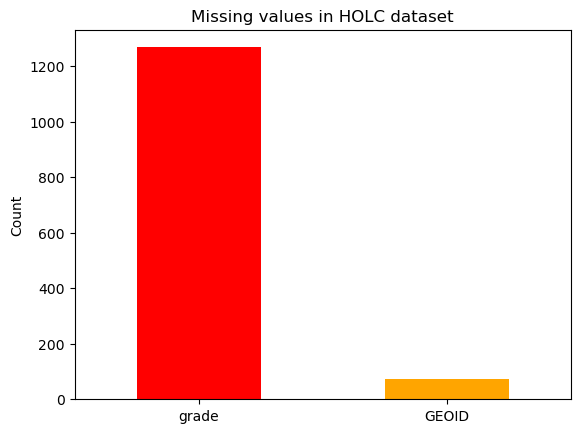

In [34]:
missing_values = df_holc.isnull().sum()

print(f"Missing HOLC grades: {missing_values['grade']}")
print(f"Missing GEOIDs: {missing_values['GEOID']}")

# visualising results
cols_to_show = ['grade', 'GEOID']
missing_values[cols_to_show].plot(kind='bar', color=['red', 'orange'])
plt.title('Missing values in HOLC dataset')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The dataset remains unstructured, with 1,268 missing HOLC ratings (`grade`) and 72 missing `GEOIDs`. Additionally, an unnecessary index column (`Unnamed: 0`) clutters the overview and identification numbers occasionally appear in unreadable scientific notation. Since nearly 20% of the data is incomplete, cleaning is required to ensure reliable calculations and prevent alignment issues. 

In [35]:
df_holc_clean = df_holc.dropna(subset=['grade', 'GEOID']) # dropping all the empty rows
df_holc_cleaned = df_holc_clean.reset_index(drop=True) # fixing the rows (indexing)
df_holc_clean.to_csv("data/Cleaned HOLC dataset.csv") 
df_holc_clean.head()

,GEOID,grade,pct_tract,city,state
31674,36001001600,A,0.06360,Albany,NY
31675,36001001700,A,0.06299,Albany,NY
31676,36001001803,A,0.02913,Albany,NY
31677,36001001804,A,0.13784,Albany,NY
31678,36001001901,A,0.20460,Albany,NY


While the HOLC data represents the historical framework, the ACS data we've acquired provides a better snapshot of the current demographic and economic landscape of New York City's neighborhoods. As the Cencus Bureau datasets contain long identifiers and include data for the entire country, the data had to be standardized first to make these files workable for our specific research. By standardizing the original `GEO_ID` columns long-form string to only 11 characters, we are able to create a 11-digit GEOID that serves as the universal key for identifying Census Tracts across datasets. 

Importing the data and understanding the sets

In [ ]:
# economic data
df_economics = pd.read_csv('data/economics.csv', low_memory=False).iloc[1:].copy() # skipping the first row with metadata

# size
rows, columns = df_economics.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

# types
print("Dataset types:\n", df_economics.dtypes)

Number of rows: 2327
Number of columns: 551
Dataset types:
 GEO_ID           object
NAME             object
DP03_0001E       object
DP03_0001M       object
DP03_0002E       object
                 ...   
DP03_0136PE      object
DP03_0136PM      object
DP03_0137PE      object
DP03_0137PM      object
Unnamed: 550    float64
Length: 551, dtype: object


In [ ]:
# demographic data
df_demographic = pd.read_csv('data/demographic.csv', low_memory=False).iloc[1:].copy() # skipping the first row with metadata

# size
rows, columns = df_demographic.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

# types
print("Dataset types:\n", df_demographic.dtypes)

Number of rows: 2327
Number of columns: 359
Dataset types:
 GEO_ID           object
NAME             object
DP05_0001E       object
DP05_0001M       object
DP05_0002E       object
                 ...   
DP05_0088PE      object
DP05_0088PM      object
DP05_0089PE      object
DP05_0089PM      object
Unnamed: 358    float64
Length: 359, dtype: object


In [40]:
# housing data
df_housing = pd.read_csv('data/housing characteristics.csv', low_memory=False).iloc[1:].copy() # skipping the first row with metadata

# size
rows, columns = df_housing.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

# types
print("Dataset types:\n", df_housing.dtypes)

Number of rows: 2327
Number of columns: 575
Dataset types:
 GEO_ID           object
NAME             object
DP04_0001E       object
DP04_0001M       object
DP04_0002E       object
                 ...   
DP04_0142PE      object
DP04_0142PM      object
DP04_0143PE      object
DP04_0143PM      object
Unnamed: 574    float64
Length: 575, dtype: object


Standardizing the data

In [41]:
# making GEOIDs (last 11 characters of GEO_ID)
for df_geoid in [df_economics, df_demographic, df_housing]:
    df_geoid['GEOID'] = df_geoid['GEO_ID'].str[-11:]

# filtering on NYC (borough codes)
nyc_borough_codes = [
    '36005', # Bronx
    '36047', # Brooklyn
    '36061', # Manhattan
    '36081', # Queens
    '36085' # Staten Islands
    ]

df_nyc_economics = df_economics[df_economics['GEOID'].str.startswith(tuple(nyc_borough_codes))].copy()
df_nyc_demographic = df_demographic[df_demographic['GEOID'].str.startswith(tuple(nyc_borough_codes))].copy()
df_nyc_housing = df_housing[df_housing['GEOID'].str.startswith(tuple(nyc_borough_codes))].copy()

In order to capture a multidimensional view of each census tract, we have integrated variables across three domains:

- Economics: including `Median_household_income`, `Unemployment_rate`, and `Poverty_rate` to assess the financial health of the area.
- Demographic: data on race and ethnictiy, such as `Hispanic_Latino`, `White_Non_Hispanic`, `Black_Non_Hispanic`, and `Asian_Non_Hispanic` to examine patterns of residential segregation.
- Housing: variables such as `Median_gross_rent`, `Owner_occupied_pct`, and `Rent_burden_35_pct_plus` to understand housing affordability and tenure.

1. Economic data selection

In [42]:
# loading in the metadata
metadata_economics = pd.read_csv('data/ACSDP5Y2020.DP03-Column-Metadata.csv') 

# filtering on keywords and selecting columns
keywords = 'EMPLOYMENT STATUS|INCOME AND BENEFITS|POVERTY LEVEL|CLASS OF WORKER'
economics_columns_meta = metadata_economics[metadata_economics['Label'].str.contains(keywords, case=False, na=False)]
economics_column_names = economics_columns_meta['Column Name'].tolist()
columns_to_select = ['GEO_ID', 'GEOID', 'NAME'] + economics_column_names
existing_columns = [col for col in columns_to_select if col in df_nyc_economics]
df_ecom = df_nyc_economics[existing_columns].copy() # making the table

# mapping and renaming ecom categories
mapping_ecom = {
    'GEOID': 'GEOID',
    'NAME': 'Neighbourhood_name', 
    'DP03_0062E': 'Median_household_income',
    'DP03_0009PE': 'Unemployment_rate',      
    'DP03_0128PE': 'Poverty_rate',           
    'DP03_0047PE': 'Private_workers_percent' 
}
df_ecom_clean = df_nyc_economics.rename(columns=mapping_ecom)
df_ecom_clean = df_ecom_clean[list(mapping_ecom.values())].copy()

# making the numbers numeric
cols_to_fix = ['Median_household_income', 'Unemployment_rate', 'Poverty_rate', 'Private_workers_percent']
df_ecom_clean[cols_to_fix] = df_ecom_clean[cols_to_fix].apply(pd.to_numeric, errors='coerce')

df_ecom_clean = df_ecom_clean[df_ecom_clean['GEOID'] != '36005000100'] # dropping this, because it's Rikers Island (prison)
df_ecom_clean = df_ecom_clean.reset_index(drop=True)
df_ecom_clean.index = df_ecom_clean.index + 1 # cleaning index

# printing results
df_ecom_clean.head()

,GEOID,Neighbourhood_name,Median_household_income,Unemployment_rate,Poverty_rate,Private_workers_percent
1,36005000200,"Census Tract 2, Bronx County, New York",68000.0,10.8,21.4,68.3
2,36005000400,"Census Tract 4, Bronx County, New York",93155.0,4.6,4.3,70.4
3,36005001600,"Census Tract 16, Bronx County, New York",34766.0,8.8,18.2,72.0
4,36005001901,"Census Tract 19.01, Bronx County, New York",61711.0,4.4,25.5,78.6
5,36005001902,"Census Tract 19.02, Bronx County, New York",53882.0,7.8,22.6,86.8


2. Demographic selection

In [43]:
# loading in the metadata
metadata_demographic = pd.read_csv('data/ACSDP5Y2020.DP05-Column-Metadata.csv') 

# selecting all columns that contain 'race'
race_columns_meta = metadata_demographic[metadata_demographic['Label'].str.contains('RACE', case=False, na=False)]
race_column_names = race_columns_meta['Column Name'].tolist()
columns_to_select = ['GEO_ID', 'GEOID', 'NAME'] + race_column_names
existing_columns = [col for col in columns_to_select if col in df_nyc_demographic.columns]

# making the table
df_race = df_nyc_demographic[existing_columns].copy()

# mapping and renaming demographic categories
mapping_demo = {
    'GEOID': 'GEOID',
    'NAME': 'Neighbourhood_name',
    'DP05_0033E': 'Total_population',
    'DP05_0071E': 'Hispanic_Latino',
    'DP05_0077E': 'White_Non_Hispanic',
    'DP05_0078E': 'Black_Non_Hispanic',
    'DP05_0080E': 'Asian_Non_Hispanic',
    'DP05_0079E': 'Native_American_Non_Hispanic',
    'DP05_0082E': 'Other_Non_Hispanic',
    'DP05_0083E': 'Two_Or_More_Races_Non_Hispanic'
}
df_race_clean = df_nyc_demographic[list(mapping_demo.keys())].copy()
df_race_clean = df_race_clean.rename(columns=mapping_demo)

# making the numbers numeric
cols_to_fix = [c for c in df_race_clean.columns if c not in ['GEOID', 'Neighbourhood_name']]
df_race_clean[cols_to_fix] = df_race_clean[cols_to_fix].apply(pd.to_numeric, errors='coerce')

df_race_clean = df_race_clean[df_race_clean['GEOID'] != '36005000100'] # Rikers Island 
df_race_clean = df_race_clean.reset_index(drop=True) 
df_race_clean.index = df_race_clean.index + 1 # cleaning index

# printing results
df_race_clean.head()

,GEOID,Neighbourhood_name,Total_population,Hispanic_Latino,White_Non_Hispanic,Black_Non_Hispanic,Asian_Non_Hispanic,Native_American_Non_Hispanic,Other_Non_Hispanic,Two_Or_More_Races_Non_Hispanic
1,36005000200,"Census Tract 2, Bronx County, New York",4167,2943,77,980,115,0,52,0
2,36005000400,"Census Tract 4, Bronx County, New York",5684,4148,371,965,87,0,2,111
3,36005001600,"Census Tract 16, Bronx County, New York",5917,3335,229,1986,63,192,55,57
4,36005001901,"Census Tract 19.01, Bronx County, New York",1910,1029,259,610,0,0,0,12
5,36005001902,"Census Tract 19.02, Bronx County, New York",1334,640,201,373,47,0,9,64


3. Housing selection

In [ ]:
# loading in the metadata
metadata_housing = pd.read_csv('data/ACSDP5Y2020.DP04-Column-Metadata.csv')

# filtering on keywords and selecting columns
keywords = 'HOUSING TENURE|GROSS RENT|OCCUPANTS PER ROOM'
housing_columns_meta = metadata_housing[metadata_housing['Label'].str.contains(keywords, case=False, na=False)]
housing_column_names = housing_columns_meta['Column Name'].tolist()
columns_to_select = ['GEO_ID', 'GEOID', 'NAME'] + housing_column_names
existing_columns = [col for col in columns_to_select if col in df_nyc_housing]

# making the table
df_house = df_nyc_housing[existing_columns].copy

# mapping and renaming housing categories
mapping_housing = {
    'GEOID': 'GEOID',
    'NAME': 'Neighborhood_name',
    'DP04_0046PE': 'Owner_occupied_pct',     # Housing Tenure (Owner)
    'DP04_0047PE': 'Renter_occupied_pct',    # Housing Tenure (Renter)
    'DP04_0134E':  'Median_gross_rent',      # Gross Rent (Dollars)
    'DP04_0142PE': 'Rent_burden_35pct_plus', # Rent as % of income (>35%)
    'DP04_0079PE': 'Overcrowding_1_01_to_1_50_pct', # Occupants per room (High)
    'DP04_0080PE': 'Overcrowding_1_51_plus_pct'     # Occupants per room (Very High)
}
df_housing_clean = df_nyc_housing.rename(columns=mapping_housing)
df_housing_clean = df_housing_clean[list(mapping_housing.values())].copy()

# making the numbers numeric
cols_to_fix_h = [c for c in df_housing_clean.columns if c not in ['GEOID', 'Neighborhood_name']]
df_housing_clean[cols_to_fix_h] = df_housing_clean[cols_to_fix_h].apply(pd.to_numeric, errors='coerce')

df_housing_clean = df_housing_clean[df_housing_clean['GEOID'] != '36005000100'] # Rikers Island
df_housing_clean = df_housing_clean.reset_index(drop=True)
df_housing_clean.index = df_housing_clean.index + 1 # cleaning index

df_housing_clean.head() # printing the result

,GEOID,Neighborhood_name,Owner_occupied_pct,Renter_occupied_pct,Median_gross_rent,Rent_burden_35pct_plus,Overcrowding_1_01_to_1_50_pct,Overcrowding_1_51_plus_pct
1,36005000200,"Census Tract 2, Bronx County, New York",57.9,42.1,1701.0,56.5,2.2,776
2,36005000400,"Census Tract 4, Bronx County, New York",73.4,26.6,1580.0,44.6,0.0,1549
3,36005001600,"Census Tract 16, Bronx County, New York",12.0,88.0,954.0,26.8,3.9,259
4,36005001901,"Census Tract 19.01, Bronx County, New York",1.0,99.0,1284.0,43.1,0.0,8
5,36005001902,"Census Tract 19.02, Bronx County, New York",18.2,81.8,1536.0,43.0,1.2,60


Merging the ACS data into one census package

In [45]:
# merging economic data with race data using GEOID
census_package = df_ecom_clean.merge(
    df_race_clean.drop(columns=['Neighbourhood_name']), # dropping Neighbourhood_name to avoid duplicate columns
    on='GEOID', how='inner') 

# merging house data into the existing census package
census_package = census_package.merge(
    df_housing_clean.drop(columns=['Neighborhood_name']), 
    on='GEOID', how='inner')

census_package = census_package.reset_index(drop=True) 
census_package.index = census_package.index + 1

census_package.head() # printing the result

,GEOID,Neighbourhood_name,Median_household_income,Unemployment_rate,Poverty_rate,Private_workers_percent,Total_population,Hispanic_Latino,White_Non_Hispanic,Black_Non_Hispanic,Asian_Non_Hispanic,Native_American_Non_Hispanic,Other_Non_Hispanic,Two_Or_More_Races_Non_Hispanic,Owner_occupied_pct,Renter_occupied_pct,Median_gross_rent,Rent_burden_35pct_plus,Overcrowding_1_01_to_1_50_pct,Overcrowding_1_51_plus_pct
1,36005000200,"Census Tract 2, Bronx County, New York",68000.0,10.8,21.4,68.3,4167,2943,77,980,115,0,52,0,57.9,42.1,1701.0,56.5,2.2,776
2,36005000400,"Census Tract 4, Bronx County, New York",93155.0,4.6,4.3,70.4,5684,4148,371,965,87,0,2,111,73.4,26.6,1580.0,44.6,0.0,1549
3,36005001600,"Census Tract 16, Bronx County, New York",34766.0,8.8,18.2,72.0,5917,3335,229,1986,63,192,55,57,12.0,88.0,954.0,26.8,3.9,259
4,36005001901,"Census Tract 19.01, Bronx County, New York",61711.0,4.4,25.5,78.6,1910,1029,259,610,0,0,0,12,1.0,99.0,1284.0,43.1,0.0,8
5,36005001902,"Census Tract 19.02, Bronx County, New York",53882.0,7.8,22.6,86.8,1334,640,201,373,47,0,9,64,18.2,81.8,1536.0,43.0,1.2,60


Since the HOLC data has already been mapped to 2020 Census Tract boundaries, we can directly link historical grades to modern socio-economic data. However, as some 2020 tracts overlap with multiple historical HOLC zones, we first identify the dominant grade (the one with the highest pct_tract) for each neighborhood.

In [46]:
# selecting the dominant HOLC grade per GEOID
df_holc_dominant = df_holc_clean.sort_values(['GEOID', 'pct_tract'], ascending=[True, False]).drop_duplicates('GEOID') 

# merging the HOLC data with the census package using GEOID
final_analysis_df = census_package.merge(df_holc_dominant, on='GEOID', how='inner')

# removing empty rows and cleaning index
final_analysis_df = final_analysis_df.dropna(subset=['Median_household_income', 'Median_gross_rent'])
final_analysis_df = final_analysis_df.reset_index(drop=True)
final_analysis_df.index = final_analysis_df.index + 1

final_analysis_df.to_csv("data/Full extra data set.csv", index=True) 

final_analysis_df.head() # printing the result

,GEOID,Neighbourhood_name,Median_household_income,Unemployment_rate,Poverty_rate,Private_workers_percent,Total_population,Hispanic_Latino,White_Non_Hispanic,Black_Non_Hispanic,...,Owner_occupied_pct,Renter_occupied_pct,Median_gross_rent,Rent_burden_35pct_plus,Overcrowding_1_01_to_1_50_pct,Overcrowding_1_51_plus_pct,grade,pct_tract,city,state
1,36005000200,"Census Tract 2, Bronx County, New York",68000.0,10.8,21.4,68.3,4167,2943,77,980,...,57.9,42.1,1701.0,56.5,2.2,776,D,0.57685,Bronx,NY
2,36005000400,"Census Tract 4, Bronx County, New York",93155.0,4.6,4.3,70.4,5684,4148,371,965,...,73.4,26.6,1580.0,44.6,0.0,1549,D,0.79310,Bronx,NY
3,36005001600,"Census Tract 16, Bronx County, New York",34766.0,8.8,18.2,72.0,5917,3335,229,1986,...,12.0,88.0,954.0,26.8,3.9,259,D,0.92401,Bronx,NY
4,36005001901,"Census Tract 19.01, Bronx County, New York",61711.0,4.4,25.5,78.6,1910,1029,259,610,...,1.0,99.0,1284.0,43.1,0.0,8,D,0.28115,Bronx,NY
5,36005001902,"Census Tract 19.02, Bronx County, New York",53882.0,7.8,22.6,86.8,1334,640,201,373,...,18.2,81.8,1536.0,43.0,1.2,60,D,0.23604,Bronx,NY


Feature distribution check
- Je wilt zien hoe je echte features verdeeld zijn in de dataset die je straks gaat gebruiken voor modelleren.

Numerical features to inspect:  ['Median_household_income', 'Unemployment_rate', 'Poverty_rate', 'Private_workers_percent', 'Total_population', 'Hispanic_Latino', 'White_Non_Hispanic', 'Black_Non_Hispanic', 'Asian_Non_Hispanic', 'Native_American_Non_Hispanic', 'Other_Non_Hispanic', 'Two_Or_More_Races_Non_Hispanic', 'Owner_occupied_pct', 'Renter_occupied_pct', 'Median_gross_rent', 'Rent_burden_35pct_plus', 'Overcrowding_1_01_to_1_50_pct', 'Overcrowding_1_51_plus_pct', 'pct_tract']

Feature: Median_household_income
count      2089.000000
mean      72282.296314
std       33504.860423
min       11343.000000
25%       49609.000000
50%       68188.000000
75%       89063.000000
max      221458.000000
Name: Median_household_income, dtype: float64
Skewness: 1.01

Feature: Unemployment_rate
count    2089.000000
mean        6.794878
std         5.000642
min         0.000000
25%         3.600000
50%         5.800000
75%         8.700000
max        93.800000
Name: Unemployment_rate, dtype: float64


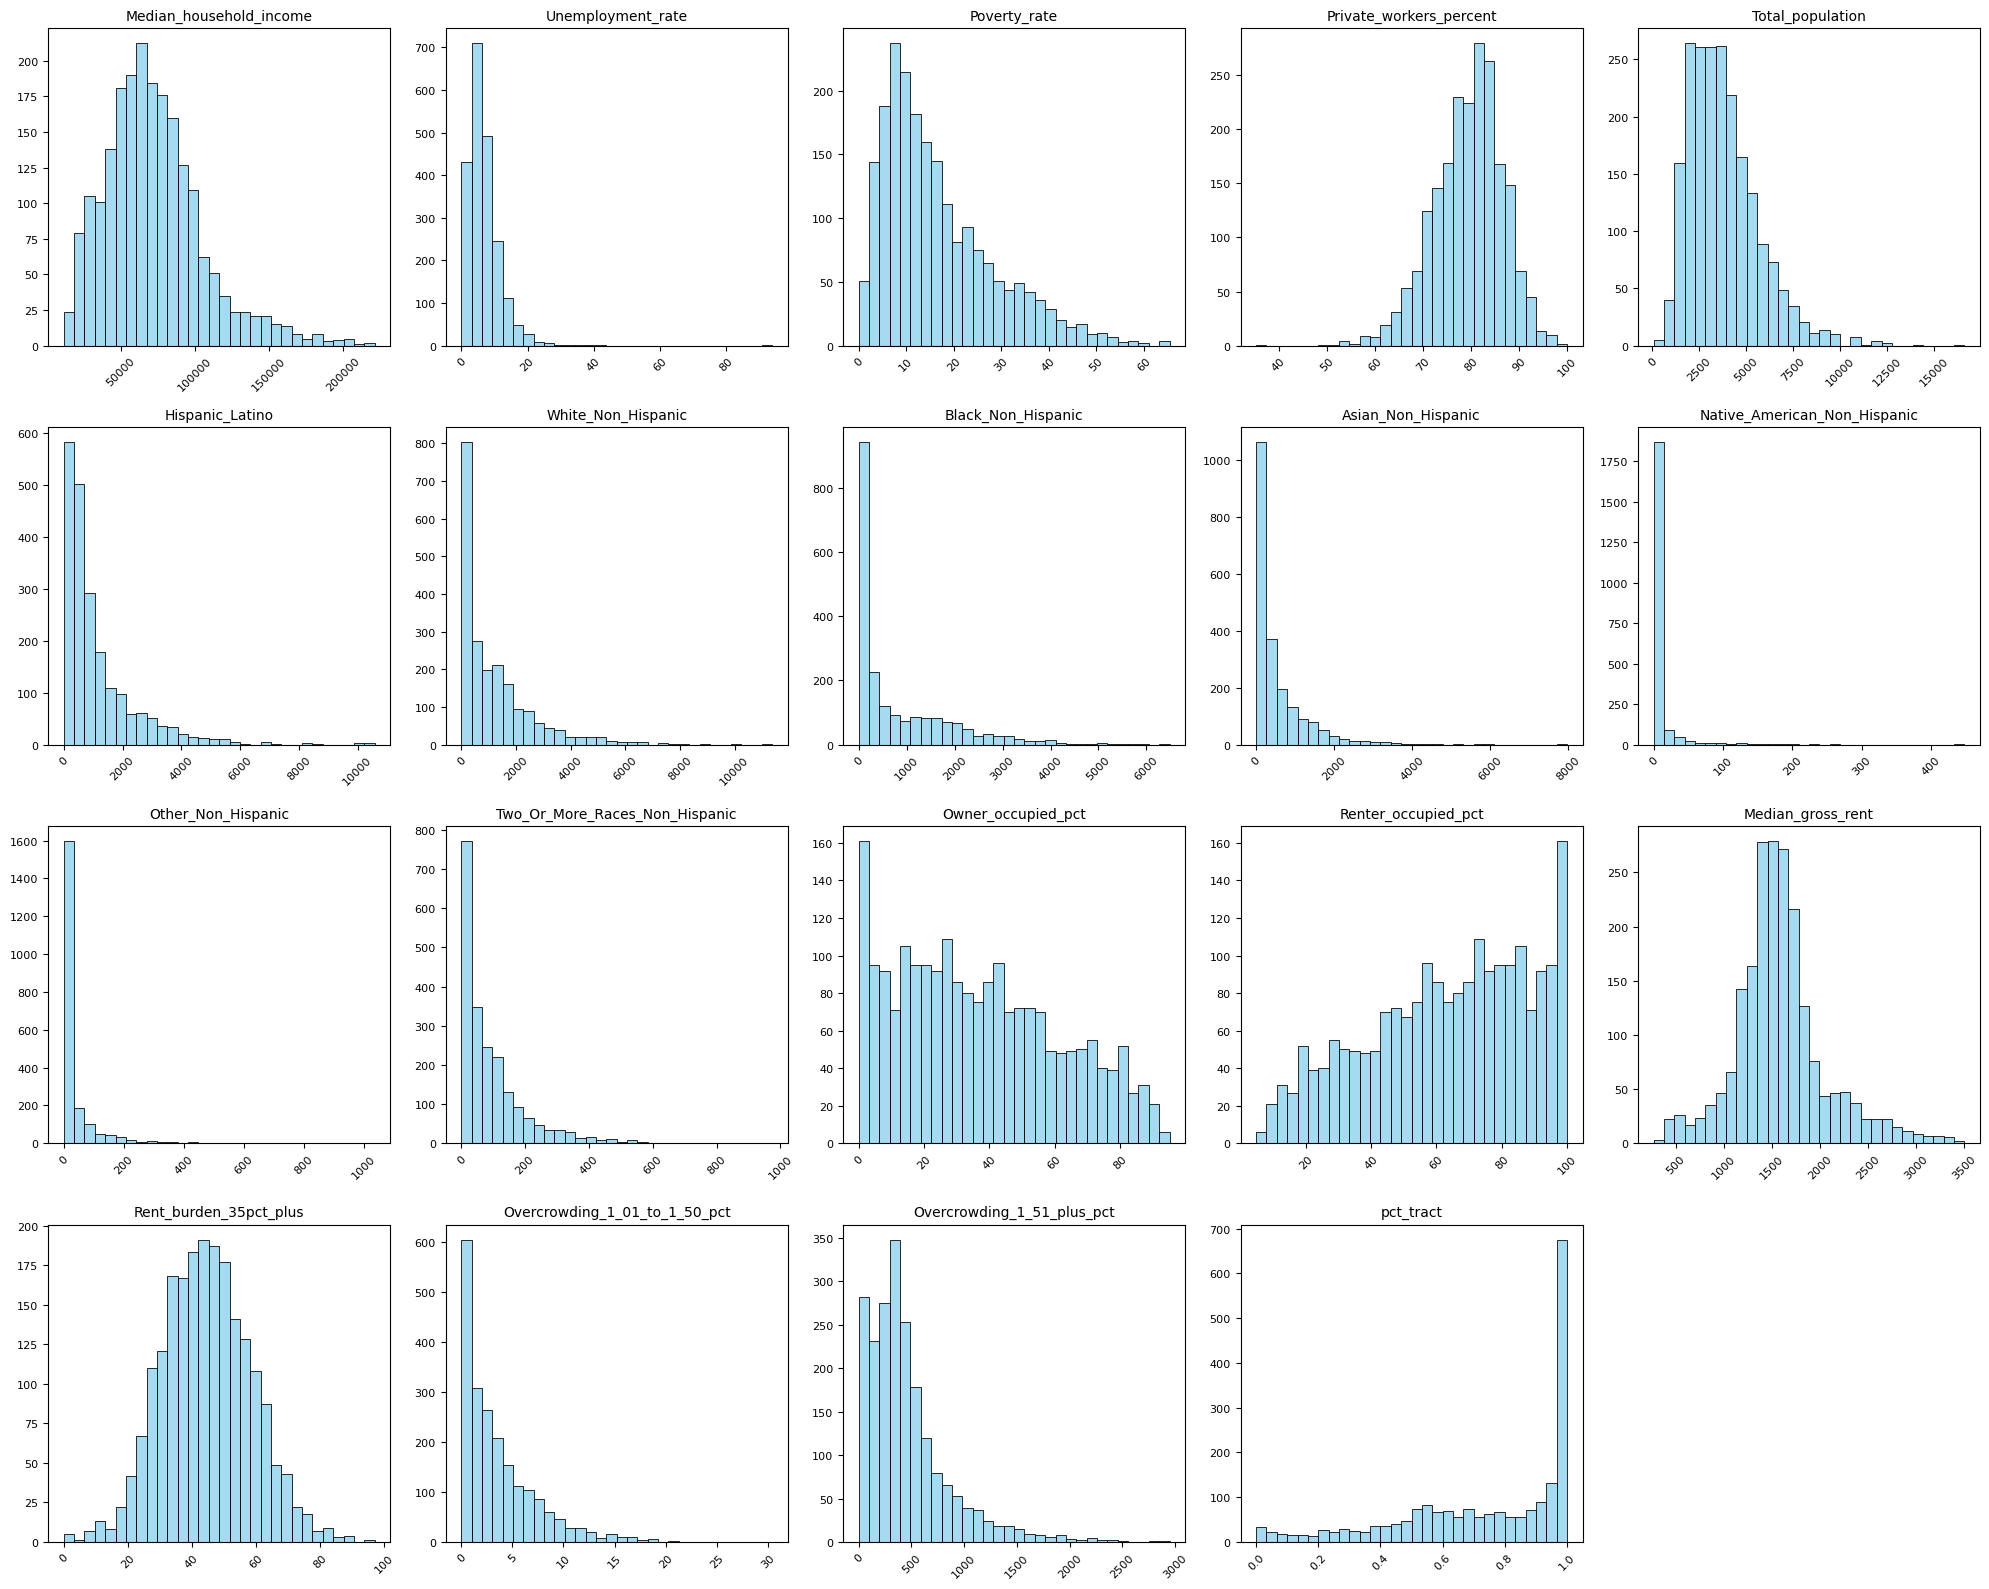

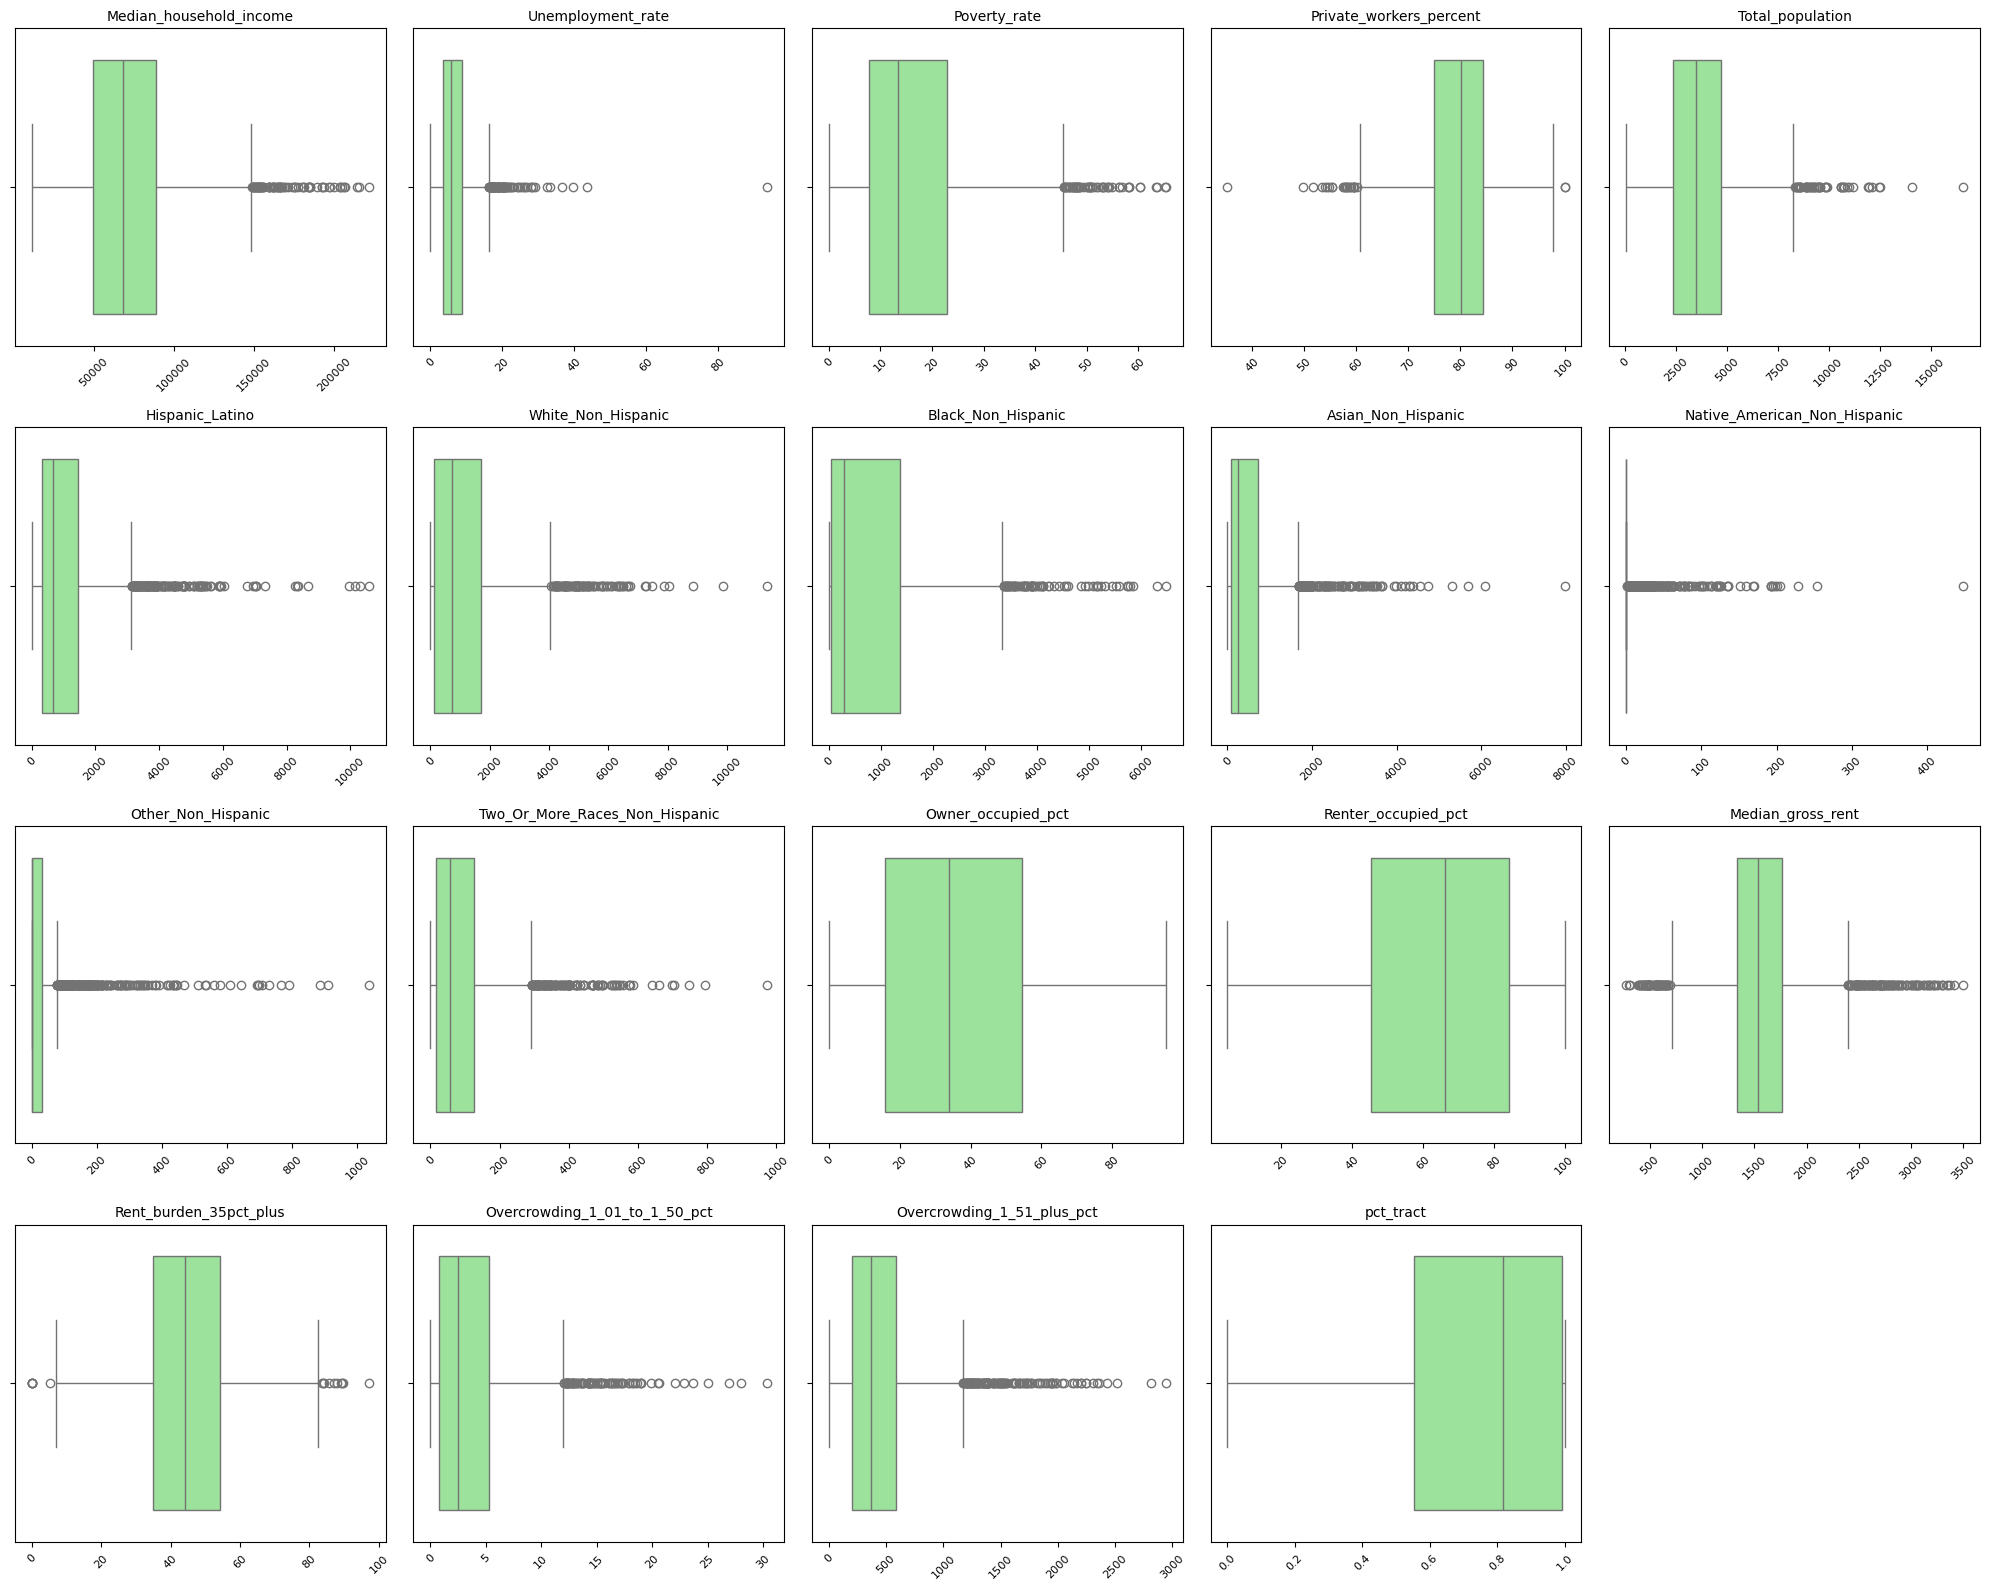

In [67]:
import math

# selecting all numeric features, exc. identifiers
numeric_features = final_analysis_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
exclude_cols = ['GEOID']
numeric_features = [f for f in numeric_features if f not in exclude_cols]

print("Numerical features to inspect: ", numeric_features)

# looping over all numeric features
for feature in numeric_features:
    print(f"\nFeature: {feature}")

    # descriptive statistics
    desc = final_analysis_df[feature].describe()
    print(desc) 

    # skewness
    skewness = final_analysis_df[feature].skew()
    print(f"Skewness: {skewness:.2f}")

# placing all features in one figure
n_features = len(numeric_features)
cols = 5  # features per row
rows = math.ceil(n_features / cols)

# histogram
plt.figure(figsize=(cols*4, rows*4))

for i, feature in enumerate(numeric_features):
    plt.subplot(rows, cols, i+1)
    sns.histplot(final_analysis_df[feature], bins=30, kde=False, color='skyblue')
    plt.title(feature, fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# boxplot
plt.figure(figsize=(cols*4, rows*4))

for i, feature in enumerate(numeric_features):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(x=final_analysis_df[feature], color='lightgreen')
    plt.title(feature, fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.xlabel('')

plt.tight_layout()
plt.show()

Since our original NYC dataset is based on zip codes, the GEOIDs had to be to be translated from census tract to ZIP Code Tabulation Areas. Additionally, the HOLC grades were converted into numeric values to facilitate quantitive analysis.

In [68]:
# loading in the datasets
df_extra = pd.read_csv("data/Full extra data set.csv", dtype={'GEOID': str}) 
url = "https://www2.census.gov/geo/docs/maps-data/data/rel2020/zcta520/tab20_zcta520_tract20_natl.txt" # crosswalk data
crosswalk = pd.read_csv(url, sep='|', dtype={'GEOID_TRACT_20': str, 'GEOID_ZCTA5_20': str})

# filtering on New York (State FIPS code '36')
crosswalk_ny = crosswalk[crosswalk['GEOID_TRACT_20'].str.startswith('36')].copy()
# a census tract can have multiple zip codes, so we take the ones with the most overlap
crosswalk_ny = crosswalk_ny.sort_values('AREALAND_PART', ascending=False).drop_duplicates('GEOID_TRACT_20') 

# merging sets
df_final = df_extra.merge(crosswalk_ny[['GEOID_TRACT_20', 'GEOID_ZCTA5_20']], 
                    left_on='GEOID', 
                    right_on='GEOID_TRACT_20', 
                    how='left')

# replacing the GEOID for the zip code
df_final.rename(columns={'GEOID_ZCTA5_20': 'zip_code'}, inplace=True)
df_final['zip_code'] = df_final['zip_code'].astype(str)

# convert grade to numeric values (1-4)
grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4}
df_final['grade'] = df_final['grade'].map(grade_map)

# removing unused columns
cols_to_drop = ['GEOID', 'GEOID_TRACT_20', 'Neighbourhood_name', 'city', 'state', 'Unnamed: 0']
df_final.drop(columns=[c for c in cols_to_drop if c in df_final.columns], inplace=True)

# moving the zip_code to the front
cols = df_final.columns.tolist()
if 'zip_code' in cols:
    cols.remove('zip_code')
    df_final = df_final[['zip_code'] + cols]

# resetting index
df_final.index = range(1, len(df_final) + 1)
df_final.index.name = None

df_final.to_csv('NYC_Redlining_met_Postcodes.csv', index=True) # saving as a csv

df_final.head() # printing the result

,zip_code,Median_household_income,Unemployment_rate,Poverty_rate,Private_workers_percent,Total_population,Hispanic_Latino,White_Non_Hispanic,Black_Non_Hispanic,Asian_Non_Hispanic,...,Other_Non_Hispanic,Two_Or_More_Races_Non_Hispanic,Owner_occupied_pct,Renter_occupied_pct,Median_gross_rent,Rent_burden_35pct_plus,Overcrowding_1_01_to_1_50_pct,Overcrowding_1_51_plus_pct,grade,pct_tract
1,10473,68000.0,10.8,21.4,68.3,4167,2943,77,980,115,...,52,0,57.9,42.1,1701.0,56.5,2.2,776,4.0,0.57685
2,10473,93155.0,4.6,4.3,70.4,5684,4148,371,965,87,...,2,111,73.4,26.6,1580.0,44.6,0.0,1549,4.0,0.79310
3,10473,34766.0,8.8,18.2,72.0,5917,3335,229,1986,63,...,55,57,12.0,88.0,954.0,26.8,3.9,259,4.0,0.92401
4,10454,61711.0,4.4,25.5,78.6,1910,1029,259,610,0,...,0,12,1.0,99.0,1284.0,43.1,0.0,8,4.0,0.28115
5,10454,53882.0,7.8,22.6,86.8,1334,640,201,373,47,...,9,64,18.2,81.8,1536.0,43.0,1.2,60,4.0,0.23604


Now the original and the new set can be merged

In [ ]:
# making sure all zip codes are numeric
df['zip_code'] = df['zip_code'].astype(int)
df_final['zip_code'] = df_final['zip_code'].astype(int)

# merging the two sets
df_new = pd.merge(df, df_final, on='zip_code', how='left')
# rename variable name as it's a count, not a percentage 
df_new.rename(columns={
    'Overcrowding_1_51_plus_pct': 'Overcrowding_1_51_plus_count'
}, inplace=True)

# missing value check on columns with socio-economic and HOLC data
socio_holc_cols = [
    'Owner_occupied_pct', 
    'Renter_occupied_pct', 
    'Median_gross_rent',
    'Rent_burden_35pct_plus', 
    'Overcrowding_1_01_to_1_50_pct',
    'Overcrowding_1_51_plus_count', 
    'grade', 
    'pct_tract'
]

# filling missing values with median
df_new[socio_holc_cols] = df_new[socio_holc_cols].fillna(df_new[socio_holc_cols].median())

# checking the results
df_new.shape
df_new[socio_holc_cols].isna().sum() 
df_new.head()

,borough_x,block,lot,zip_code,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,...,Other_Non_Hispanic,Two_Or_More_Races_Non_Hispanic,Owner_occupied_pct,Renter_occupied_pct,Median_gross_rent,Rent_burden_35pct_plus,Overcrowding_1_01_to_1_50_pct,Overcrowding_1_51_plus_count,grade,pct_tract
0,1,400,11,10009,1900.0,2404.0,6875.0,6875.0,0.0,18.0,...,0.0,134.0,0.4,99.6,491.0,35.0,2.1,8.0,4.0,0.25065
1,1,400,11,10009,1900.0,2404.0,6875.0,6875.0,0.0,18.0,...,0.0,18.0,5.8,94.2,2506.0,32.6,4.9,60.0,4.0,1.00000
2,1,400,11,10009,1900.0,2404.0,6875.0,6875.0,0.0,18.0,...,0.0,162.0,0.8,99.2,419.0,42.1,0.4,14.0,4.0,0.03351
3,1,400,11,10009,1900.0,2404.0,6875.0,6875.0,0.0,18.0,...,18.0,135.0,8.0,92.0,862.0,42.3,2.7,143.0,4.0,1.00000
4,1,400,11,10009,1900.0,2404.0,6875.0,6875.0,0.0,18.0,...,0.0,137.0,17.8,82.2,1667.0,35.2,5.6,333.0,4.0,0.85153


quick sanitiy check

*“After merging the socio-economic and historical HOLC data at ZIP-code level, all variables were inspected for plausibility. Value ranges and distributions aligned with expectations from ACS documentation, and no additional cleaning was required. Missing values were imputed using median values to preserve sample size.”*

In [73]:
df_new[socio_holc_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Owner_occupied_pct,471768.0,42.579742,24.255818,0.00000,23.50000,41.20000,61.20000,95.2
Renter_occupied_pct,471768.0,57.420378,24.255772,4.80000,38.80000,58.80000,76.50000,100.0
Median_gross_rent,471768.0,1637.452845,464.516716,272.00000,1394.00000,1579.00000,1806.00000,3500.0
Rent_burden_35pct_plus,471768.0,44.012537,14.777537,0.00000,33.80000,43.70000,54.00000,97.1
Overcrowding_1_01_to_1_50_pct,471768.0,3.322813,3.730103,0.00000,0.60000,2.20000,4.80000,30.4
Overcrowding_1_51_plus_count,471768.0,543.916389,431.524552,0.00000,273.00000,427.00000,676.00000,2946.0
grade,471768.0,3.043199,0.763458,1.00000,3.00000,3.00000,4.00000,4.0
pct_tract,471768.0,0.727124,0.279660,0.00012,0.54436,0.80359,0.98999,1.0


### **Training and modeling the new data with the same models** 

Feature selection

In [96]:
features = [
    # baseline features
    'borough_x',
    'zip_code',
    'lotarea',
    'bldgarea',
    'resarea',
    'comarea',
    'unitsres',
    'unitstotal',
    'numfloors',
    'building_age',
    'latitude',
    'longitude',

    # extended features
    'Owner_occupied_pct',
    'Renter_occupied_pct',
    'Median_gross_rent',
    'Rent_burden_35pct_plus',
    'Overcrowding_1_01_to_1_50_pct',
    'Overcrowding_1_51_plus_count',
    'grade',
    'pct_tract'
]

# feature matrix X
X = df_new[features]

# target variable y
y = df_new['log_sale_price'] 

Splitting the data

In [95]:
# 80% train data, 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Baseline Linear Regression Model

In [51]:
# train model
regression = LinearRegression()
# fit model
regression.fit(X_train, y_train)

# make predictions
predictions_lr = regression.predict(X_test)

# model evaluation
rmse_lregression = np.sqrt(mean_squared_error(y_test, predictions_lr))
print("RMSE for LR model: ", rmse_lregression)

RMSE for LR model:  0.31922108304724583


Ridge Regression Model

In [97]:
# train model
ridge_r = Ridge(alpha=1.0)
# fit model
ridge_r.fit(X_train, y_train)

# make predictions
predictions_ridge = ridge_r.predict(X_test)

# model evaluation
rmse_rregresion = np.sqrt(mean_squared_error(y_test, predictions_ridge))
print("RMSE for RR model: ", rmse_rregresion)

RMSE for RR model:  0.31922170900119273


Lasso Regression Model

In [98]:
# create new pipeline
lasso_p = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.001, max_iter=10000))
    ])

# fit the model
lasso_p.fit(X_train, y_train)

# make predictions
predictions_lasso = lasso_p.predict(X_test)

# model evaluation
rmse_lasso_regression = np.sqrt(mean_squared_error(y_test, predictions_lasso))

print("RMSE for Lasso Regression Model: ", rmse_lasso_regression)

RMSE for Lasso Regression Model:  0.3206669187247946


Random Forest Regression Model

In [99]:
# train model
forest_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
# fit model
forest_model.fit(X_train, y_train)

# make predictions
predictions_rf = forest_model.predict(X_test)

# model evaluation
rmse_forest = np.sqrt(mean_squared_error(y_test, predictions_rf))

print("RMSE for RF model: ", rmse_forest)

RMSE for RF model:  0.11476484475494592


Comparison table

In [100]:
# dataframe
model_rmse_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'RandomForestRegressor'],
    'RMSE': [rmse_lregression, rmse_rregresion, rmse_lasso_regression, rmse_forest]
})

# results
model_rmse_results

,Model,RMSE
0,Linear Regression,0.319221
1,Ridge Regression,0.319222
2,Lasso Regression,0.320667
3,RandomForestRegressor,0.114765


Feature importance extraction from the Random Forest Model, as it performed best

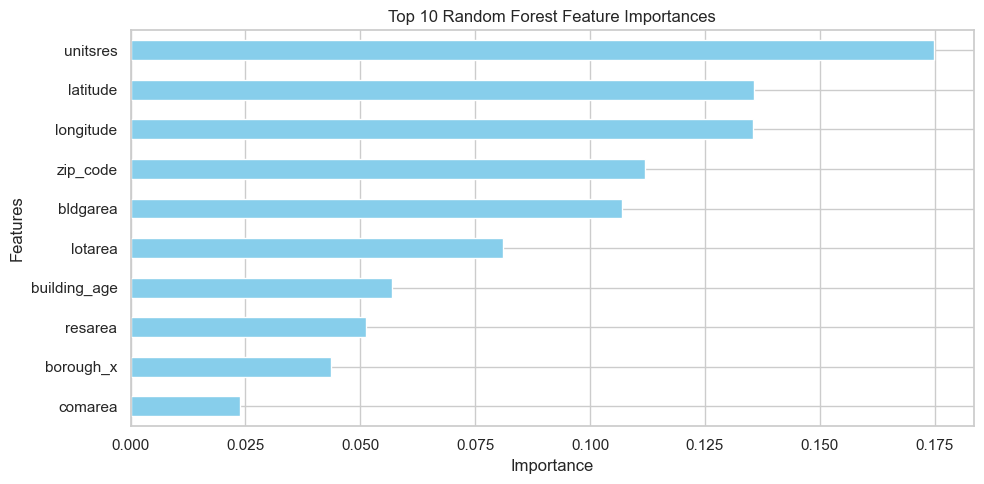

In [ ]:
# extract feature importances from Random Forest Model
f_importance = pd.Series(forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# plotting
top_features = f_importance.head(10)
plt.figure(figsize=(10,5))
top_features.plot(kind='barh', color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Random Forest Feature Importances')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()